In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [5]:
data = pd.read_csv("data.csv")
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68950,53.0,2,168,76.0,120,80,1,1,1,0,1,0
68951,62.0,1,158,126.0,140,90,2,2,0,0,1,1
68952,52.0,2,183,105.0,180,90,3,1,0,1,0,1
68953,61.0,1,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot:xlabel='BMI'>

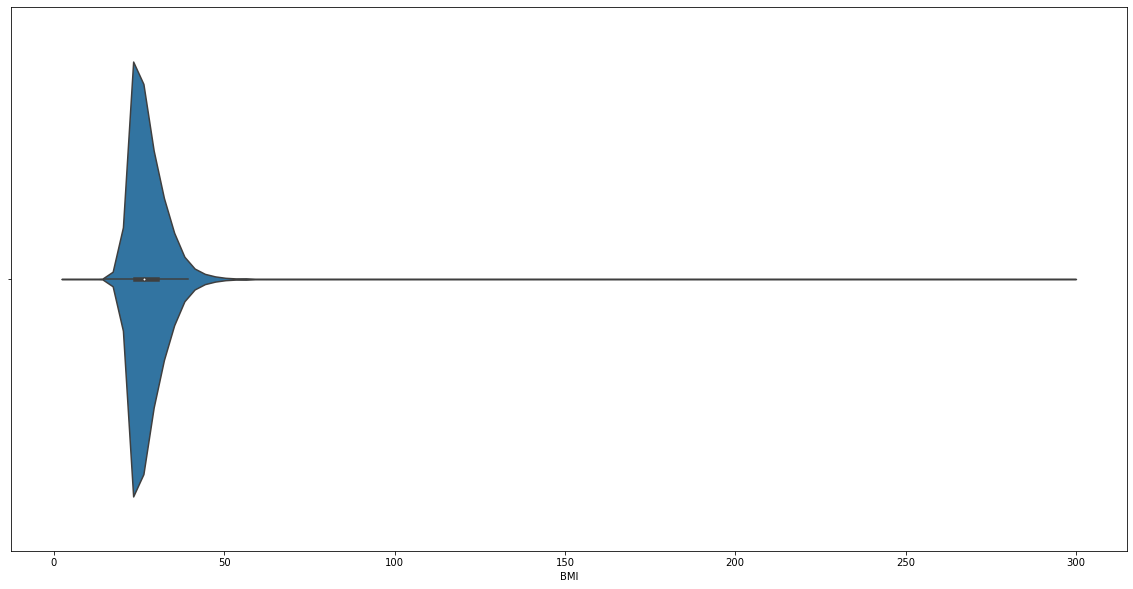

In [13]:
# Based on medical knowledge, BMI is an important metric
height = data["height"]
weight = data["weight"]

# BMI = Weght in Kg / (Height in meter) ^ 2

data["BMI"] = round(weight/ (height/100)**2,1)
bmi = data["BMI"]
# Look at the distribution of the BMI
fig = plt.figure(figsize = (20,10))
sb.violinplot(x = data["BMI"])

In [15]:
# Using BMI, we can construct 1 more categorical variable call Obesity
# 0 - Underweight ( BMI < 18.5)
# 1 - Healthy ( 18.5 <= BMI < 25)
# 2 - Overweight (25 <= BMI < 30)
# 3 = Obese ( BMI > 30 )

data["Obesity"] = 0 # Set everyone to 0
data.loc[bmi >= 18.5, "Obesity"] = 1 # Use condition to compare
data.loc[bmi >= 25, "Obesity"] = 2
data.loc[bmi >= 30, "Obesity"] = 3
data["Obesity"] = data["Obesity"].astype("category")
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Obesity
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9,3
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7,2
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68950,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.9,2
68951,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.5,3
68952,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.4,3
68953,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.1,2


<AxesSubplot:xlabel='Obesity', ylabel='cardio'>

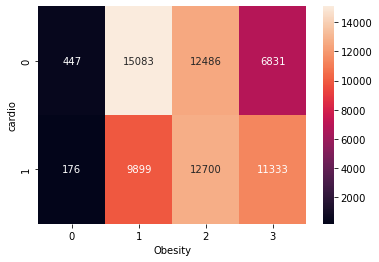

In [16]:
display(sb.heatmap(data.groupby(["cardio","Obesity"]).size().unstack(), annot = True, fmt = "0.0f"))

In [ ]:
# Base on the obesity rating we can see that 
# - For underweight and healthy people, the majority don't have disease
# - For overweight people, the number of people having and not having disease is comparable
# - For obese people, the majority has disease.
# This category can be useful 

In [18]:
# Plot the BMI graph to visualize
fig = plt.figure(figsize = (20,10))
plt.scatter(x = "weight",y = "height", c = "Obesity", data = data)
x_val = np.arange(0,300)
plt.plot(x_val,np.sqrt(x_val/18.5)*100, c = "b", label = "BMI = 18.5")
plt.plot(x_val,np.sqrt(x_val/25)*100, c = "r", label = "BMI = 25")
plt.plot(x_val,np.sqrt(x_val/30)*100, c = "black", label = "BMI = 30")
plt.legend()
plt.show()